In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [2]:
df= pd.read_csv('Mall_Customers.csv')

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
#Title change
df.rename(columns={'Gender':'gender', 'Age':'age','Annual Income (k$)':'income', 'Spending Score (1-100)':'score'},inplace=True)

In [5]:
df

,CustomerID,gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
df.shape

(200, 5)

In [7]:
df.isnull().values.any()

False

In [8]:
df.describe()

,CustomerID,age,income,score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


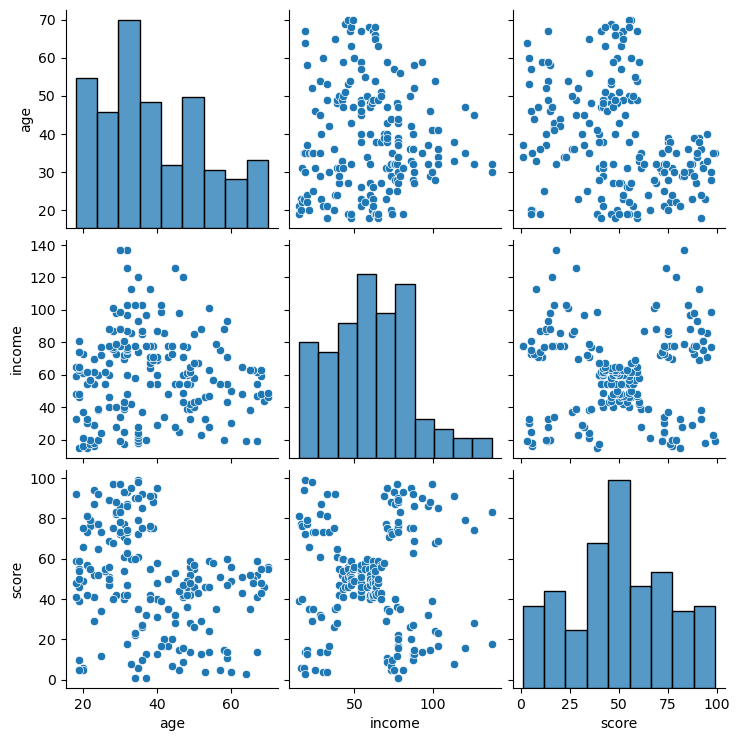

In [9]:
#Histogram Graph
seaborn.pairplot(df[['age','income','score']])

In [10]:
import sklearn.cluster as cluster

In [11]:
kmeans=cluster.KMeans(n_clusters=5)

In [12]:
kmeans=kmeans.fit(df[['score','income']])

In [13]:
kmeans.cluster_centers_

array([[49.51851852, 55.2962963 ],
       [17.11428571, 88.2       ],
       [82.12820513, 86.53846154],
       [20.91304348, 26.30434783],
       [79.36363636, 25.72727273]])

In [14]:
df['income_clusters']=kmeans.labels_

In [15]:
df

,CustomerID,gender,age,income,score,income_clusters
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,1
197,198,Male,32,126,74,2
198,199,Male,32,137,18,1


In [16]:
df['income_clusters'].value_counts()

0    81
2    39
1    35
3    23
4    22
Name: income_clusters, dtype: int64

<AxesSubplot:xlabel='income', ylabel='score'>

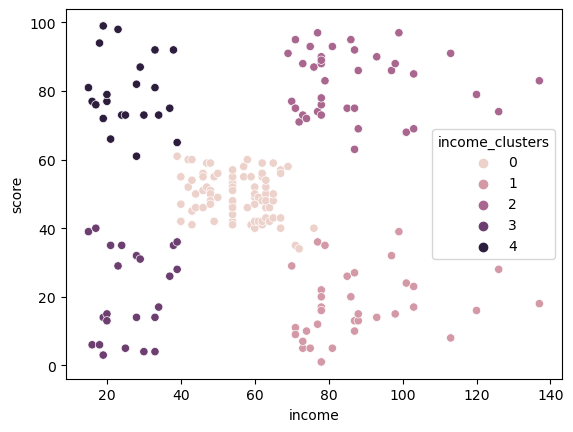

In [17]:
seaborn.scatterplot(x='income',y='score',hue='income_clusters',data=df)

In [18]:
kmeans=cluster.KMeans(n_clusters=2)

In [19]:
kmeans=kmeans.fit(df[['age','score']])

In [20]:
kmeans.cluster_centers_

array([[28.95294118, 73.62352941],
       [46.16521739, 32.88695652]])

In [21]:
df['age_clusters']=kmeans.labels_

In [22]:
df['age_clusters'].value_counts()

1    115
0     85
Name: age_clusters, dtype: int64

In [23]:
df

,CustomerID,gender,age,income,score,income_clusters,age_clusters
0,1,Male,19,15,39,3,1
1,2,Male,21,15,81,4,0
2,3,Female,20,16,6,3,1
3,4,Female,23,16,77,4,0
4,5,Female,31,17,40,3,1
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,0
196,197,Female,45,126,28,1,1
197,198,Male,32,126,74,2,0
198,199,Male,32,137,18,1,1


<AxesSubplot:xlabel='age', ylabel='score'>

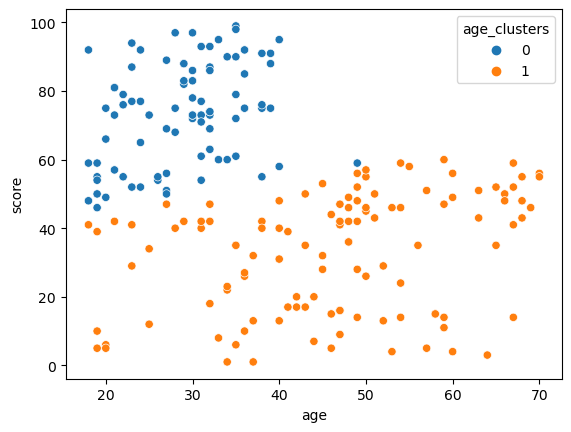

In [24]:
seaborn.scatterplot(x='age',y='score', hue='age_clusters', data=df)

In [26]:
#Elno Method
from sklearn.cluster import KMeans

In [31]:
k_range=range(1,12)
wcss = []

In [33]:
for k in k_range:
    km =KMeans(n_clusters=k)
    km.fit(df[['income','score']])
    wcss.append(km.inertia_)

C:\Users\badhonkhan481\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [34]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30273.394312070042,
 25022.485004530354,
 21850.165282585636,
 19657.783608703958,
 17602.19046838677]

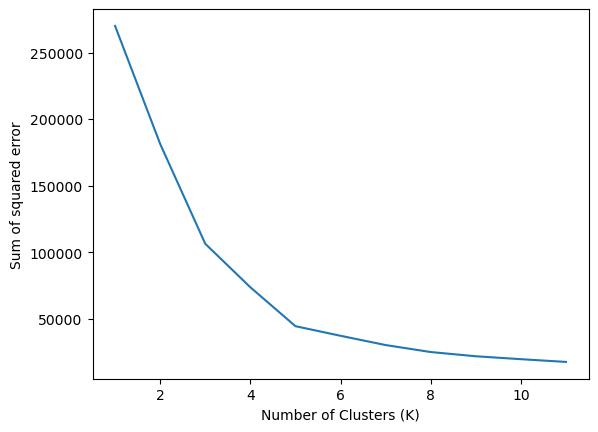

In [35]:
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of squared error')
plt.plot(k_range, wcss)

In [36]:
k_range2=range(1,12)
wcss2 = []


In [37]:
for k in k_range2:
    km =KMeans(n_clusters=k)
    km.fit(df[['age','score']])
    wcss2.append(km.inertia_)

C:\Users\badhonkhan481\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [38]:
wcss2

[171535.5,
 75949.15601023019,
 45840.67661610867,
 28165.58356662934,
 23839.26248334166,
 19502.4078393622,
 15514.193134351035,
 13046.228436764524,
 11567.122909957734,
 10228.006282023129,
 9385.21648838279]

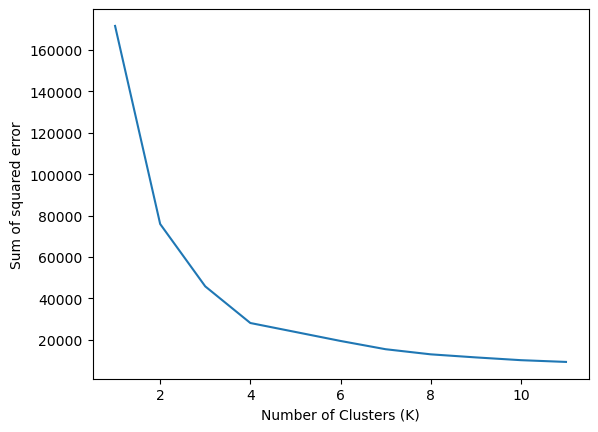

In [39]:
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of squared error')
plt.plot(k_range2, wcss2)